In [90]:
import numpy as np 
import pandas as pd 
#import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

import os
print(os.listdir("stanford-cars-dataset/"))

['00001.jpg', '11110005, 12201007, 12201089 & 13201033_CSE.pdf', 'anno_test.csv', 'anno_train.csv', 'cars_annos.mat', 'cars_test', 'cars_test.zip', 'cars_train', 'cars_train.zip', 'names.csv']


In [91]:
path_base = 'stanford-cars-dataset'

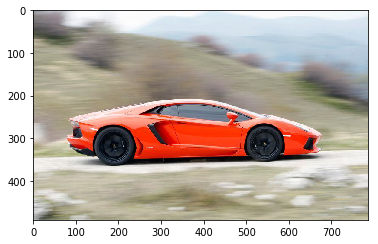

In [103]:
image = Image.open(path_base + '/cars_train/cars_Train/01684.jpg')
imgplot = plt.imshow(image)
plt.show()

In [108]:
class_names = []

with open(path_base + '/names.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile, delimiter=';')
    for row in csvReader:
        class_names.append(row[0])

print(class_names)

['AM General Hummer SUV 2000', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007', 'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW Z4 Convertible 2012

In [109]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K

In [110]:
K.set_learning_phase(1)
img_width, img_height = 224, 224
nb_train_samples = 8144
nb_validation_samples = 8041
epochs = 10
batch_size = 32
n_classes = 196

In [111]:
train_data_dir = path_base + '/cars_train/cars_train'
validation_data_dir = path_base + '/cars_test/cars_test'

In [112]:
list = os.listdir(train_data_dir) 
train_files = len(list)
train_files

8144

In [113]:
list = os.listdir(validation_data_dir)
test_files = len(list)
test_files

8041

In [114]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True
)

In [115]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [117]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 0 images belonging to 0 classes.


In [118]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 0 images belonging to 0 classes.
